In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [13]:
axioms = ["PROP1", "EF1", "EFX", "EF"]

In [14]:
df = pd.read_csv("result.csv")
df["Instance"] = df["Instance"].map(lambda x: Path(x).name)
for axiom in axioms:
    df[axiom + " ratio"] = df[axiom] / df["Total"]
df

,Instance,N,M,Total,Algorithm,EF1,EFX,EF,PROP1,PROP1 ratio,EF1 ratio,EFX ratio,EF ratio
0,10_12_32490.instance,10,12,945,existence,945,945,49,945,1.000000,1.000000,1.000000,0.051852
1,10_12_32490.instance,10,12,945,remove all the agents,162,46,0,943,0.997884,0.171429,0.048677,0.000000
2,10_12_32490.instance,10,12,945,remove the best agent,110,26,0,945,1.000000,0.116402,0.027513,0.000000
3,10_2_33687.instance,10,2,945,existence,945,945,0,945,1.000000,1.000000,1.000000,0.000000
4,10_2_33687.instance,10,2,945,remove all the agents,801,801,0,945,1.000000,0.847619,0.847619,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,9_9_6518.instance,9,9,945,remove all the agents,310,46,0,945,1.000000,0.328042,0.048677,0.000000
758,9_9_6518.instance,9,9,945,remove the best agent,329,37,0,945,1.000000,0.348148,0.039153,0.000000
759,9_9_6608.instance,9,9,945,existence,945,377,0,945,1.000000,1.000000,0.398942,0.000000
760,9_9_6608.instance,9,9,945,remove all the agents,291,17,0,943,0.997884,0.307937,0.017989,0.000000


In [15]:
print("Number of Instances . . .")
print("All:", len(df["Instance"].unique()))
print("n = 4:", len(df[df["N"] == 4]["Instance"].unique()))
print("n >= 5:", len(df[df["N"] >= 5]["Instance"].unique()))
print("m <= 5:", len(df[df["M"] <= 5]["Instance"].unique()))
print("m >= 6:", len(df[df["M"] >= 6]["Instance"].unique()))

Number of Instances . . .
All: 254
n = 4: 120
n >= 5: 134
m <= 5: 108
m >= 6: 146


In [16]:
# Statistics of N
print("N ", "min:", df[df["Algorithm"]=="existence"]["N"].min(), ", max:", df[df["Algorithm"]=="existence"]["N"].max(), ", median:", df[df["Algorithm"]=="existence"]["N"].median())
# Statistics of M
print("M ", "min:", df[df["Algorithm"]=="existence"]["M"].min(), ", max:", df[df["Algorithm"]=="existence"]["M"].max(), ", median:", df[df["Algorithm"]=="existence"]["M"].median())

N  min: 4 , max: 15 , median: 5.0
M  min: 1 , max: 59 , median: 6.0


In [17]:
dfmelt = df.melt(id_vars=["Instance", "Algorithm", "N", "M"], value_vars=[a + " ratio" for a in axioms], var_name="Axiom", value_name="Fraction of Pairings")
axiom_rename_map = {
    'PROP1 ratio': 'PROP1',
    'EF1 ratio': 'EF1',
    'EFX ratio': 'EFX',
    'EF ratio': 'EF'
}
dfmelt['Axiom'] = dfmelt['Axiom'].map(axiom_rename_map).fillna(dfmelt['Axiom'])
dfmelt

,Instance,Algorithm,N,M,Axiom,Fraction of Pairings
0,10_12_32490.instance,existence,10,12,PROP1,1.000000
1,10_12_32490.instance,remove all the agents,10,12,PROP1,0.997884
2,10_12_32490.instance,remove the best agent,10,12,PROP1,1.000000
3,10_2_33687.instance,existence,10,2,PROP1,1.000000
4,10_2_33687.instance,remove all the agents,10,2,PROP1,1.000000
...,...,...,...,...,...,...
3043,9_9_6518.instance,remove all the agents,9,9,EF,0.000000
3044,9_9_6518.instance,remove the best agent,9,9,EF,0.000000
3045,9_9_6608.instance,existence,9,9,EF,0.000000
3046,9_9_6608.instance,remove all the agents,9,9,EF,0.000000


In [18]:
# Result Statistics
print("\nexistence")
for a in axioms:
    print(a, dfmelt[(dfmelt["Algorithm"] == "existence") & (dfmelt["Axiom"] == a)]["Fraction of Pairings"].mean()) 
print("\nremove all the agents")
for a in axioms:
    print(a, dfmelt[(dfmelt["Algorithm"] == "remove all the agents") & (dfmelt["Axiom"] == a)]["Fraction of Pairings"].mean()) 
print("\nremove the best agent")
for a in axioms:
    print(a, dfmelt[(dfmelt["Algorithm"] == "remove the best agent") & (dfmelt["Axiom"] == a)]["Fraction of Pairings"].mean()) 


existence
PROP1 1.0
EF1 1.0
EFX 0.9568368120651586
EF 0.43630575344748573

remove all the agents
PROP1 0.9952797566970795
EF1 0.7343568303962005
EFX 0.5339665875098946
EF 0.26827896512935884

remove the best agent
PROP1 1.0
EF1 0.8556212973378328
EFX 0.5996349414656502
EF 0.2629171353580802


In [21]:
def my_plot(data, title):
    sns.set_theme(style="ticks", palette="bright")
    sns.set_context("talk")

    plt.figure(figsize=(16, 7))
    plt.title(title, fontsize=20, pad=15)
    plt.xlabel("", fontsize=16)
    plt.ylabel("Fraction of Pairings", fontsize=16)

    ax = sns.barplot(
        data=data, 
        x="Axiom", 
        y="Fraction of Pairings", 
        hue="Algorithm",
        dodge=True
    )

    # Remove the top and right spines for a cleaner look
    sns.despine()
    # Adjust legend position
    plt.legend(title='Algorithm', bbox_to_anchor=(0.75, 1), loc='upper left', borderaxespad=0)
    # Ensure everything fits without overlapping
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust rect to make space for the legend
    plt.show()


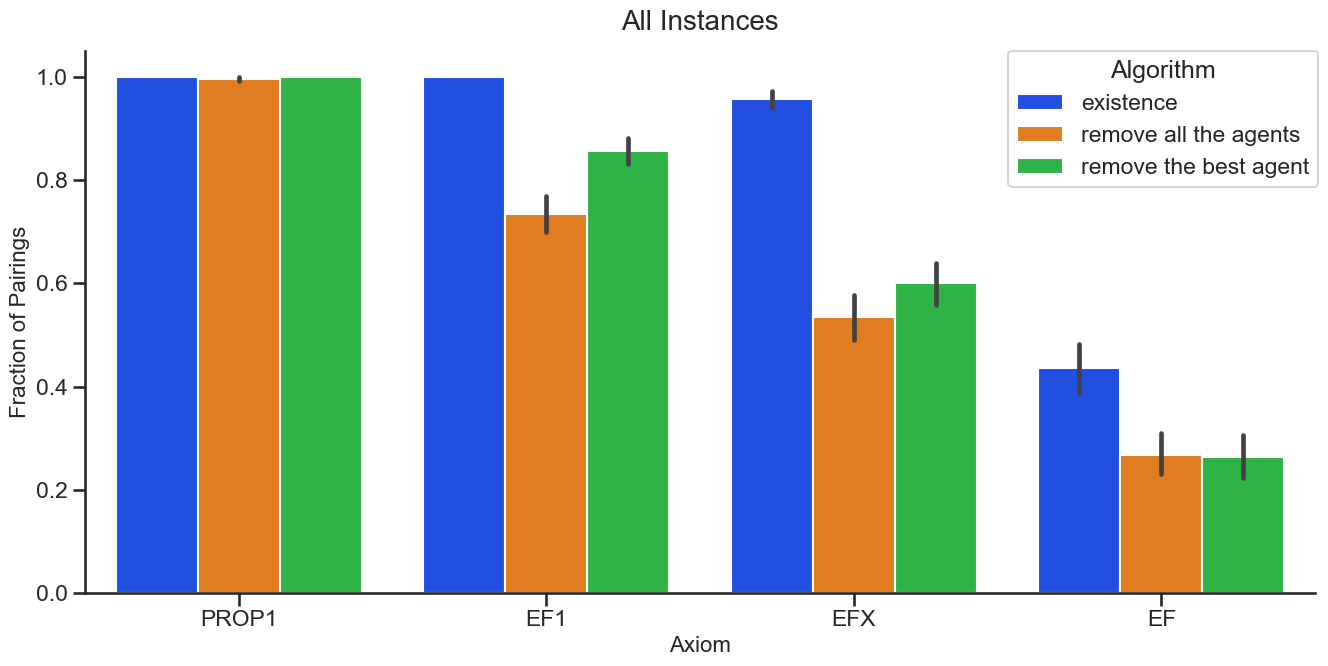

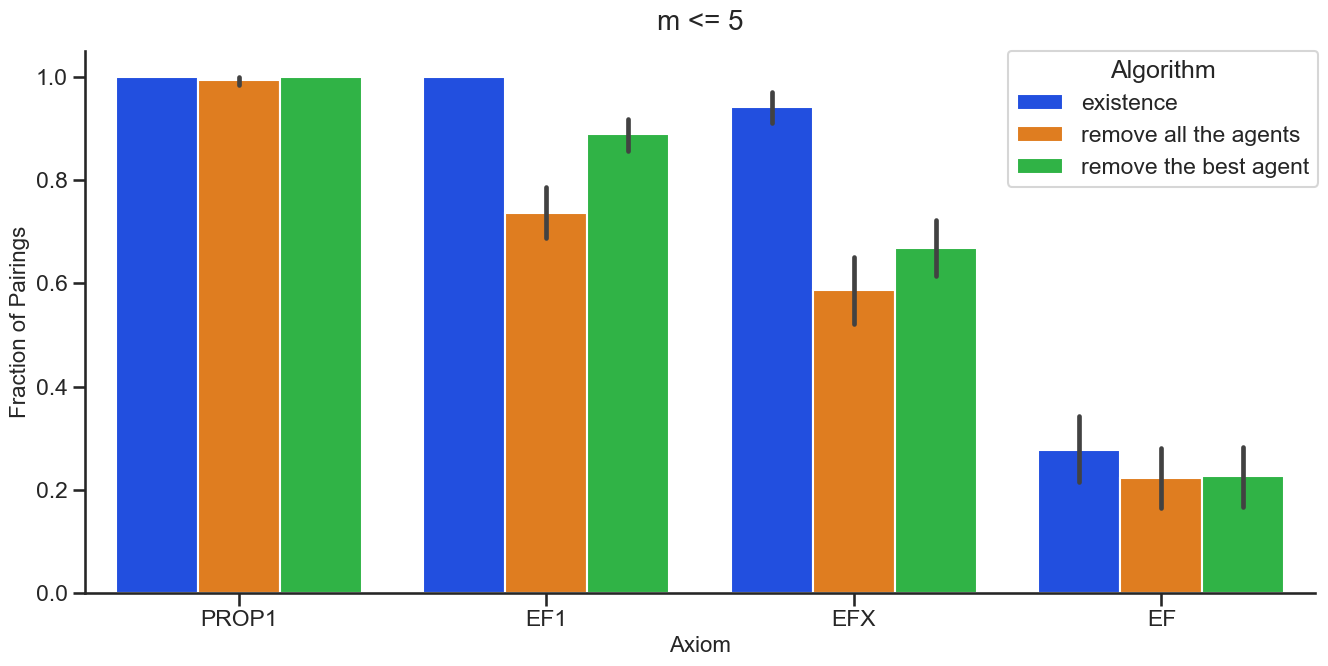

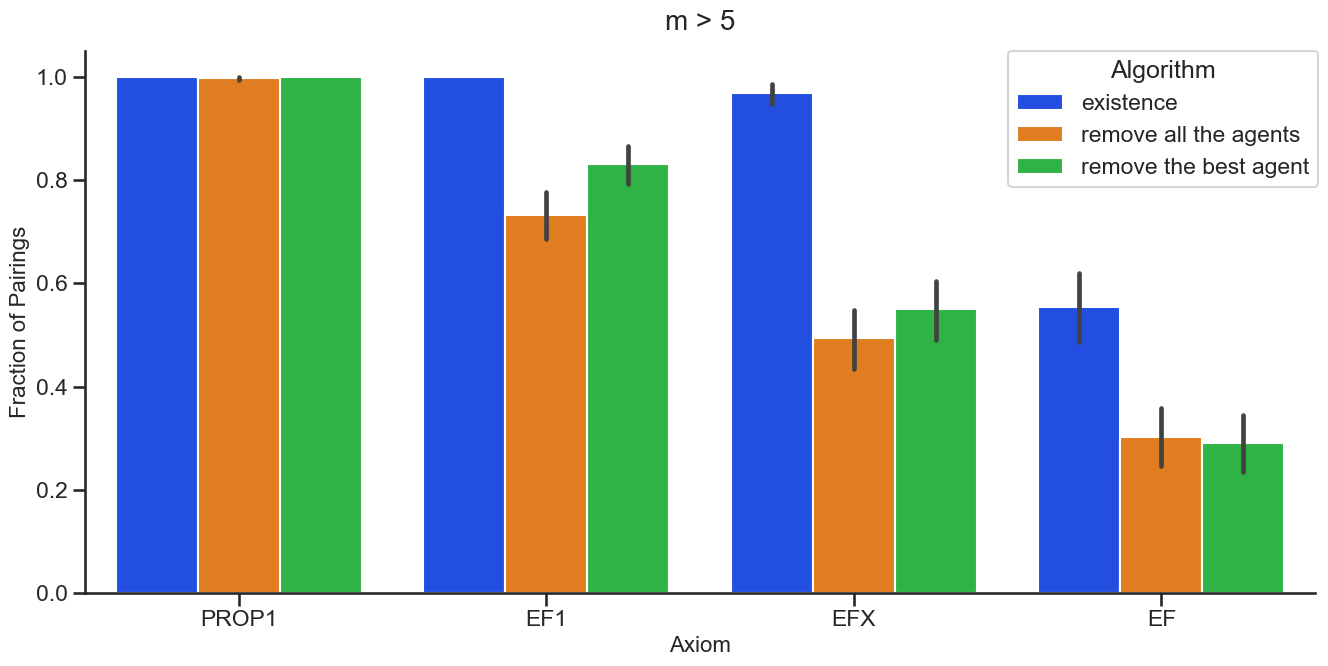

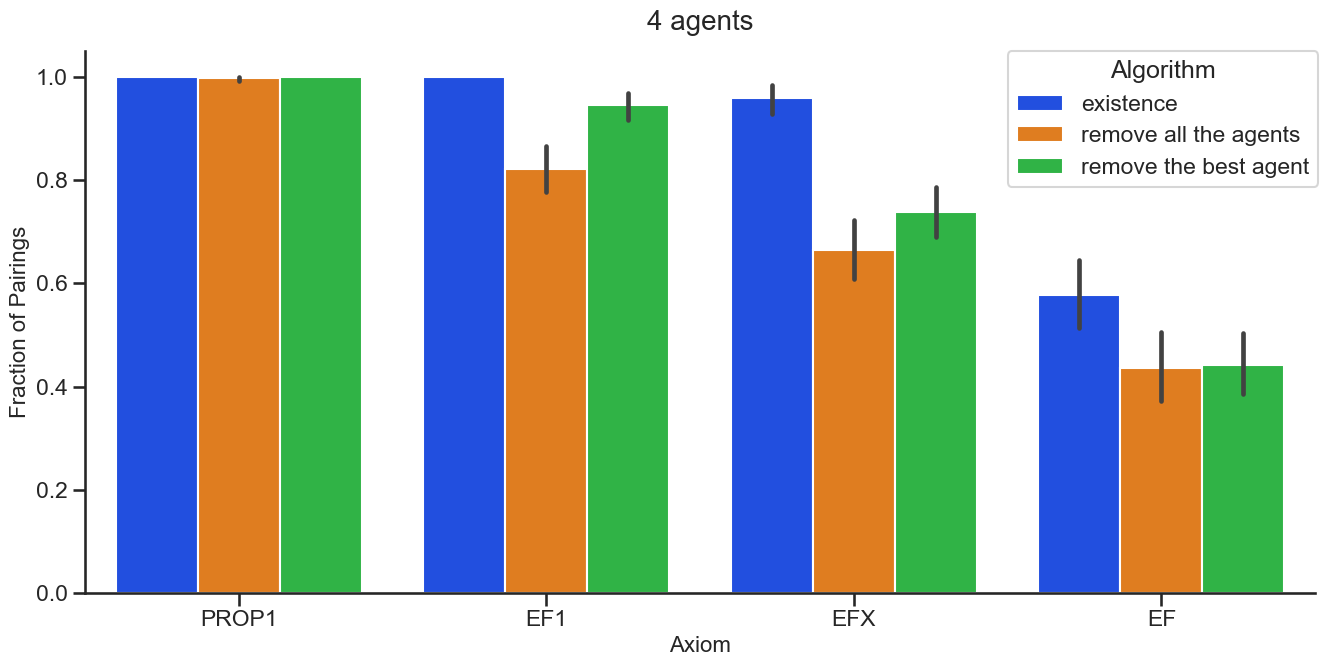

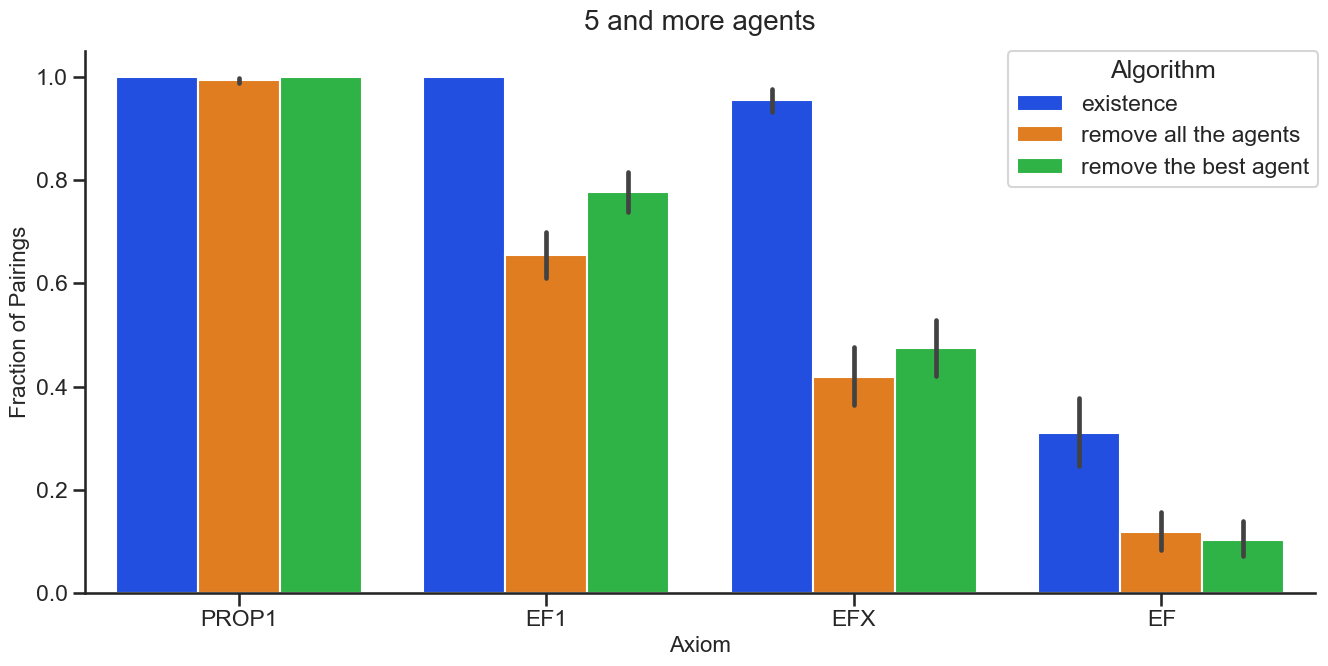

In [22]:
my_plot(data = dfmelt[dfmelt["Algorithm"].isin(["existence", "remove all the agents", "remove the best agent"])], title = "All Instances")
my_plot(data = dfmelt[(dfmelt["Algorithm"].isin(["existence", "remove all the agents", "remove the best agent"])) & (dfmelt["M"]<=5)], title = "m <= 5")
my_plot(data = dfmelt[(dfmelt["Algorithm"].isin(["existence", "remove all the agents", "remove the best agent"])) & (dfmelt["M"]> 5)], title = "m > 5")
my_plot(data = dfmelt[(dfmelt["Algorithm"].isin(["existence", "remove all the agents", "remove the best agent"])) & (dfmelt["N"]==4)], title = "4 agents")
my_plot(data = dfmelt[(dfmelt["Algorithm"].isin(["existence", "remove all the agents", "remove the best agent"])) & (dfmelt["N"]>=5)], title = "5 and more agents")